<a href="https://colab.research.google.com/github/MR1319/TorchSisso/blob/main/Test_Regressor_SISSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Installation***

In [1]:
!pip install TorchSisso

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 7

# ***Case Studies***

In [2]:
'''
######################################################################################################

CaseStudy-1

#######################################################################################################
'''

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from TorchSisso import SISSO_model
import torch
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

np.random.seed(42) # To keep the data stable
# Generate random data for 100 datapoints
num_datapoints = 100

data = {
    'Velocity': np.random.uniform(low=1, high=20, size=num_datapoints),
    'Density': np.random.uniform(low=1, high=5,size=num_datapoints),
    'Viscosity': np.random.uniform(low=1, high=2,size=num_datapoints),
    'Length': np.random.uniform(low=1, high=100,size=num_datapoints)
}
# Create dataframe
df_R = pd.DataFrame(data)

# Calculate Reynolds number
df_R.insert(0,'ReynoldsNumber',((df_R['Velocity'] * df_R['Density'] * df_R['Length']) / df_R['Viscosity']) + 0.01*np.random.normal(0,1,100))


X = df_R.drop('ReynoldsNumber', axis=1)  # Features
y = df_R['ReynoldsNumber']  # Target variable

# Split the data into training and testing sets (10% train, 90% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
train = pd.concat([y_train, X_train], axis=1)
train.reset_index(drop=True, inplace=True)
test = pd.concat([y_test, X_test], axis=1)
test.reset_index(drop=True, inplace=True)

#Give the mathematical operator set
operators = ['/','*','+','-']
start_c = time.time()
rmse, equation = SISSO_model(train,operators,3,1,20).fit()
print("SISSO Completed in: ",time.time()-start_c,'\n')


Starting Feature Space Construction in cpu


Starting Initial Feature Expansion


Number Of Features In The Initial Expanded Feature Space:  30


Number Of Features in First Feature Space Expansion After Screening:  34


Time taken to create and screen features for first level feature expansion:   0.114  seconds


Starting Second Level Feature Expansion


Number Of Features In The Second Expanded Feature Space:  2835


Number Of Features in Second Feature Space Expansion After Screening:  2726


Time taken to create and screen features for second level feature expansion:   0.354  seconds




Starting SISSO in cpu


Equation:  0.9999956178522412*((Density*Length)/(Viscosity/Velocity))+0.005957346783735937


RMSE:  0.011214399445320931


Time taken to generate one dimensional equation:  0.09097719192504883  seconds


SISSO Completed in:  0.6313331127166748 



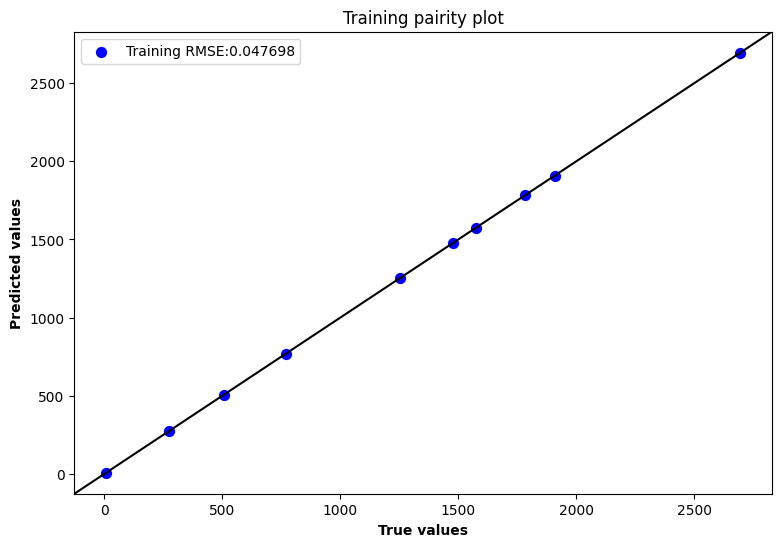

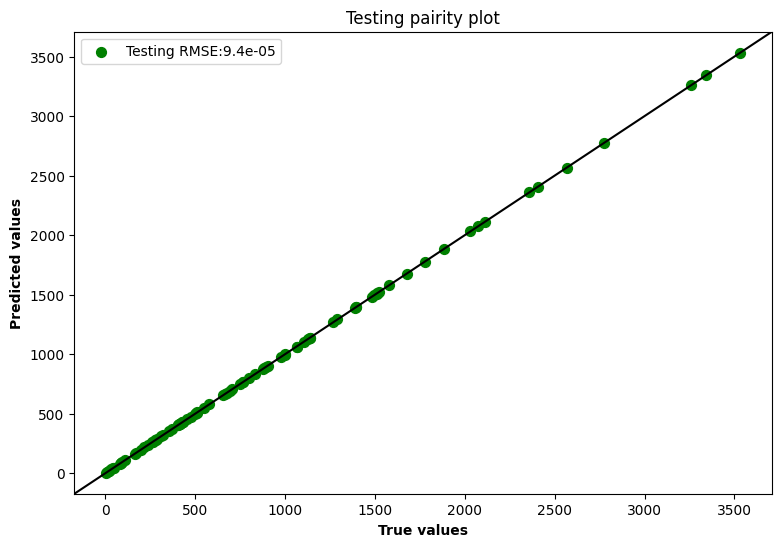

In [4]:
#copy and paset the Equation generated from the SISSO model here

Velocity = train.iloc[:,1]
Density = train.iloc[:,2]
Viscosity = train.iloc[:,3]
Length = train.iloc[:,4]
equ = 0.9999956178522412*((Density*Length)/(Viscosity/Velocity))+0.005957346783735937  # Changes according to the data


#diagonal line and figure size
fig = plt.figure(figsize=(9,6))
plt.plot([0,1],[0,1],transform=plt.gca().transAxes,color="black")
plt.scatter(train.iloc[:,0],equ,c='b',s=50,label=f'Training RMSE:{round(rmse,6)}')
plt.xlabel("True values",weight='bold')
plt.ylabel("Predicted values",weight='bold')
plt.title('Training pairity plot')
plt.legend()
plt.show()

print()

#copy and paset the Equation generated from the SISSO model here
Velocity = test.iloc[:,1]
Density = test.iloc[:,2]
Viscosity = test.iloc[:,3]
Length = test.iloc[:,4]
equ = 0.9999956178522412*((Density*Length)/(Viscosity/Velocity))+0.005957346783735937  # Changes according to the data

rmse_test = mean_squared_error(test.iloc[:,0],equ,squared=True)
#diagonal line and figure size
fig = plt.figure(figsize=(9,6))
plt.plot([0,1],[0,1],transform=plt.gca().transAxes,color="black")
plt.scatter(test.iloc[:,0],equ,c='green',s=50,label=f'Testing RMSE:{round(rmse_test,6)}')
plt.xlabel("True values",weight='bold')
plt.ylabel("Predicted values",weight='bold')
plt.title('Testing pairity plot')
plt.legend()
plt.show()

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat May 13 21:51:33 2023

@author: muthyala.7
"""



'''
########################################################################################################

CaseStudy - 2

#######################################################################################################
'''
x = [np.random.uniform(0,2,size=100) for i in range(4)]
df = pd.DataFrame()
for i in range(len(x)):
  variable = 'x'+str(i+1)
  df[variable] = x[i]
operators = ['+','/']
y = 5*((df.iloc[:,0])/(df.iloc[:,1]*(df.iloc[:,2]+df.iloc[:,3]))) + 3 + 0.01*np.random.normal(0,1,100)
df.insert(0,'Target',y)


start_c = time.time()
rmse, equation = SISSO_model(df,operators,3,1,5).fit()

print('SISSO Completed in : ',time.time()-start_c,'\n')

'''
###############################################################################################

CaseStudy -3
###############################################################################################
'''

y1 = 3*np.sqrt(df.iloc[:,1]) + 2.5*np.sin(df.iloc[:,2]) + 2.5 + 0.01*np.random.normal(0,1,100)
df['Target'] = y1
operators = ['sqrt','sin']
start_c = time.time()
rmse, equation = SISSO_model(df,operators,3,2,5).fit()

print("SISSO Completed in: ",time.time()-start_c,'\n')


'''
##########################################################################################################

CaseStudy-4

#########################################################################################################
'''

y2 = 3*np.exp(df.iloc[:,3])/(df.iloc[:,2]+np.exp(df.iloc[:,1])) + 0.05*np.random.normal(0,1,100)
df['Target'] = y2
operators = ['/','+','exp']
start_c = time.time()
rmse, equation = SISSO_model(df,operators,4,1,20).fit()

print("SISSO Completed in: ",time.time()-start_c,'\n')


Starting Feature Space Construction in cpu


Starting Initial Feature Expansion


Number Of Features In The Initial Expanded Feature Space:  18


Number Of Features in First Feature Space Expansion After Screening:  22


Time taken to create and screen features for first level feature expansion:   0.02  seconds


Starting Second Level Feature Expansion


Number Of Features In The Second Expanded Feature Space:  711


Number Of Features in Second Feature Space Expansion After Screening:  715


Time taken to create and screen features for second level feature expansion:   0.257  seconds




Starting SISSO in cpu


Equation:  4.999733619413293*((x1/x2)/(x3+x4))+3.001026024364217


RMSE:  0.009493611256068008


Time taken to generate one dimensional equation:  0.0035657882690429688  seconds


SISSO Completed in :  0.2931187152862549 

Starting Feature Space Construction in cpu


Starting Initial Feature Expansion


Number Of Features In The Initial Expanded Feature Space:  8


Number Of Fe